In [2]:
import pandas as pd
data = pd.read_csv('final_training_data.csv')
data.head()

,Unnamed: 0,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,TotalBsmtSF,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,0,-0.208034,0.651479,1.050994,0.878668,0.510015,2,2,2,-0.459303,...,-0.951226,5,1,0.992426,1,0.311725,0.351000,-0.752176,0.216503,208500
1,1,0.409895,-0.071836,0.156734,-0.429577,-0.572835,3,1,2,0.466465,...,0.600495,4,1,-0.101543,1,0.311725,-0.060731,1.626195,-0.704483,181500
2,2,-0.084449,0.651479,0.984752,0.830215,0.322174,2,2,2,-0.313369,...,0.600495,4,1,0.911391,1,0.311725,0.631726,-0.752176,-0.070361,223500
3,3,-0.414011,0.651479,-1.863632,-0.720298,-0.572835,3,0,3,-0.687324,...,0.600495,2,5,0.789839,2,1.650307,0.790804,-0.752176,-0.176048,140000
4,4,0.574676,1.374795,0.951632,0.733308,1.360826,2,2,2,0.199680,...,0.600495,4,1,0.870874,1,1.650307,1.698485,0.780197,0.563760,250000


In [4]:
df = data.drop('Unnamed: 0',axis=1)

In [5]:
df

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,TotalBsmtSF,HeatingQC,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,-0.208034,0.651479,1.050994,0.878668,0.510015,2,2,2,-0.459303,0,...,-0.951226,5,1,0.992426,1,0.311725,0.351000,-0.752176,0.216503,208500
1,0.409895,-0.071836,0.156734,-0.429577,-0.572835,3,1,2,0.466465,0,...,0.600495,4,1,-0.101543,1,0.311725,-0.060731,1.626195,-0.704483,181500
2,-0.084449,0.651479,0.984752,0.830215,0.322174,2,2,2,-0.313369,0,...,0.600495,4,1,0.911391,1,0.311725,0.631726,-0.752176,-0.070361,223500
3,-0.414011,0.651479,-1.863632,-0.720298,-0.572835,3,0,3,-0.687324,2,...,0.600495,2,5,0.789839,2,1.650307,0.790804,-0.752176,-0.176048,140000
4,0.574676,1.374795,0.951632,0.733308,1.360826,2,2,2,0.199680,0,...,0.600495,4,1,0.870874,1,1.650307,1.698485,0.780197,0.563760,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,-0.331620,-0.071836,0.918511,0.733308,-0.572835,3,2,2,-0.238122,0,...,0.600495,4,1,0.830356,1,0.311725,-0.060731,-0.752176,-0.100558,175000
1395,0.615871,-0.071836,0.222975,0.151865,0.084610,3,1,2,1.104925,4,...,2.152216,4,1,-0.020508,2,0.311725,0.126420,2.033231,-0.704483,210000
1396,-0.166839,0.651479,-1.002492,1.024029,-0.572835,0,4,3,0.215641,0,...,2.152216,2,1,-1.519651,1,-1.026858,-1.033914,-0.752176,0.201405,266500
1397,-0.084449,-0.795151,-0.704406,0.539493,-0.572835,3,1,3,0.046905,2,...,-0.951226,5,1,-1.154995,2,-1.026858,-1.090059,2.168910,-0.704483,142125


In [7]:
y = df['SalePrice']
x = df.drop('SalePrice',axis=1)
print(x.shape)
print(y.shape)

(1399, 25)
(1399,)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
regressors = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}

In [12]:

# Dictionary to store the performance metrics
metrics = {
    "Model": [],
    "Mean Absolute Error": [],
    "Mean Squared Error": [],
    "R-squared": []
}



In [15]:
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split
train_x ,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=24)

In [17]:

# Train, predict and evaluate each model
for name, regressor in regressors.items():
    regressor.fit(train_x, train_y)
    test_predictions = regressor.predict(test_x)
    
    mae = mean_absolute_error(test_y, test_predictions)
    mse = mean_squared_error(test_y, test_predictions)
    r2 = r2_score(test_y, test_predictions)
    
    metrics["Model"].append(name)
    metrics["Mean Absolute Error"].append(mae)
    metrics["Mean Squared Error"].append(mse)
    metrics["R-squared"].append(r2)

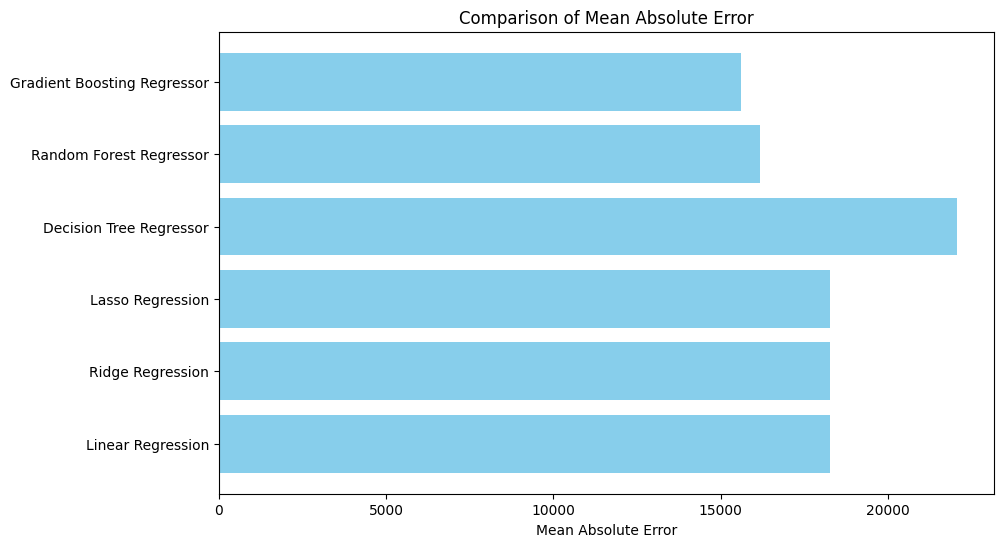

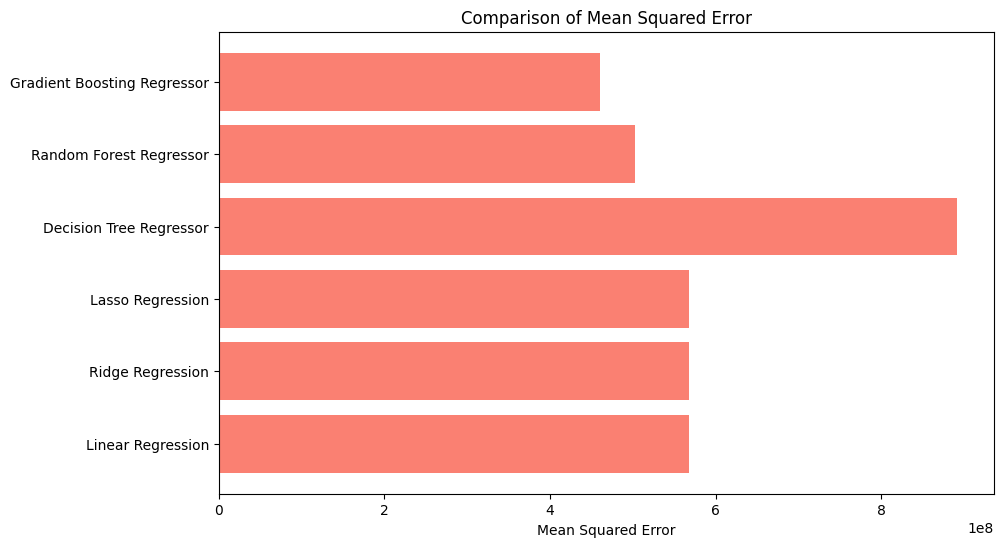

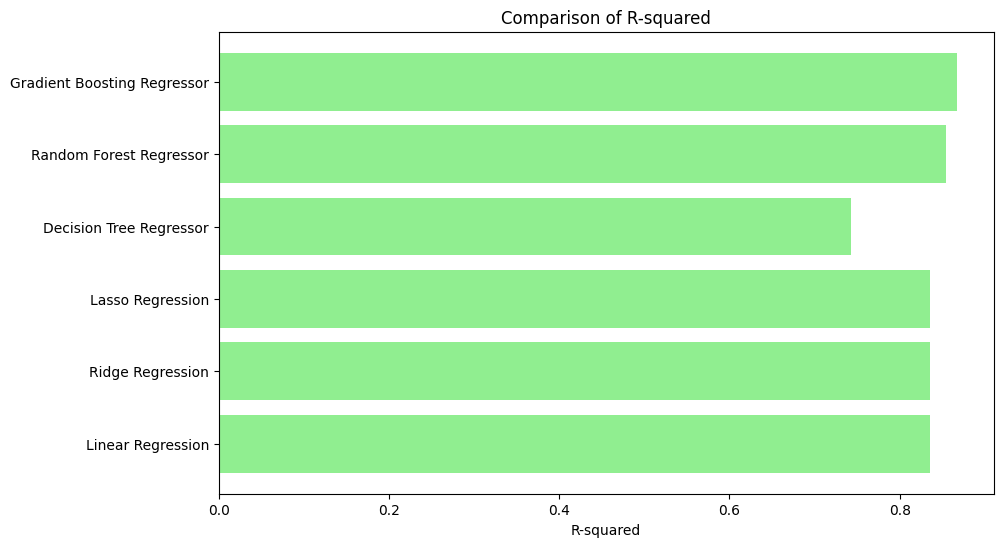

In [19]:
metrics_df = pd.DataFrame(metrics)

# Plotting Mean Absolute Error
plt.figure(figsize=(10, 6))
plt.barh(metrics_df["Model"], metrics_df["Mean Absolute Error"], color='skyblue')
plt.xlabel('Mean Absolute Error')
plt.title('Comparison of Mean Absolute Error')
plt.show()

# Plotting Mean Squared Error
plt.figure(figsize=(10, 6))
plt.barh(metrics_df["Model"], metrics_df["Mean Squared Error"], color='salmon')
plt.xlabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error')
plt.show()

# Plotting R-squared
plt.figure(figsize=(10, 6))
plt.barh(metrics_df["Model"], metrics_df["R-squared"], color='lightgreen')
plt.xlabel('R-squared')
plt.title('Comparison of R-squared')
plt.show()